In [50]:
"""
Title: Transform Non-linear Separable Data to Linear Seperable Data
Author: Yi Rong and Reza Rawassizadeh from Boston University
Contact: yirong@bu.edu
Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC # "Support vector classifier"
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from ipywidgets import interact, fixed
from matplotlib.colors import LinearSegmentedColormap

# customize figure size
plt.rcParams['figure.figsize'] = (8, 6)

In [51]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Figure 9-9 a

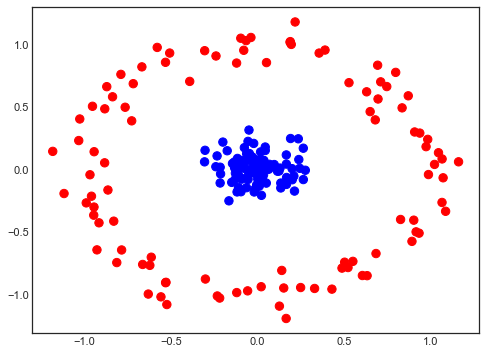

In [52]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

# change the color of dots
colors = [(1, 0, 0),  (0, 0, 1)]  # R -> B
cmap_name = 'my_cmap'
rezacm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=2)

plt.style.use('seaborn-white')


# make the bg white
plt.rcParams['axes.facecolor'] = 'white'
#plt.rcParams[]
# make border black


plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap=rezacm)
#plt.title('', size = 20)
#plot_svc_decision_function(clf, plot_support=False);

        
plt.savefig("fig9-9-raw", dpi=400)

Figure 9-9 b

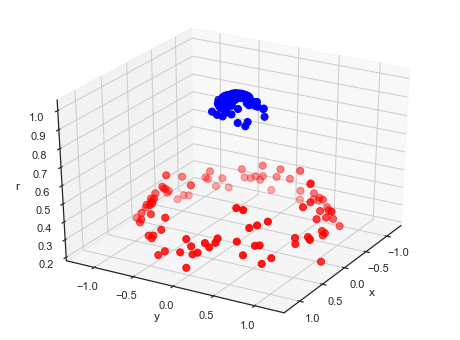

<Figure size 576x432 with 0 Axes>

In [83]:
r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits import mplot3d

#plt.style.use('seaborn-white')
#plt.rcParams['axes.facecolor'] = 'white'


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=rezacm)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.title('', size = 20)
     
interact(plot_3D, elev=[30, 90], azip=(-180, 180),X=fixed(X), y=fixed(y));

plt.show();    
plt.savefig("fig9-9-c", dpi=400)

In [ ]:
#----- SVM example with diffee